## Sharpe Ratio: A Must-Know for Every Investor

![Mitigating Risk and Return](/pictures/risk-return-concept.jpg)

## Sharpe Ratio: A Must-Know for Every Investor

As a financial engineer with over 20 years of experience, I understand just how crucial the Sharpe Ratio is for evaluating investments. This essential metric provides a way to measure the risk-adjusted return of a portfolio, enabling smarter investment decisions. Let's dive into the concept of the Sharpe Ratio and learn how to use Python to analyze and visualize it using real-world examples such as QQQ vs. SPY.


## Understanding the Sharpe Ratio

### What is the Sharpe Ratio?

The Sharpe Ratio is a financial measure used to evaluate the return of an investment compared to its risk. The key formula behind this ratio is:

$$
Sharpe Ratio = \frac{R_p - R_f}{\sigma_p} 
$$

Where:

* \(R_p\) is the expected return of the portfolio
* \(R_f\) is the risk-free rate (such as Treasury yield)
* \(\sigma_p\) represents the standard deviation of the portfolio's excess return, symbolizing the risk

By defining how much excess return you are achieving for every unit of risk, the Sharpe Ratio helps you make informed investment decisions.


### Key Benefits and Limitations

One cannot ignore the advantages of using Sharpe Ratio:

1. **Assessing Performance**: Easily compare different investments by their risk-adjusted returns.
2. **Identifying Efficient Portfolios**: Helps in finding portfolios that offer higher returns for a certain risk level.
3. **Standardization**: Offers a common measure across various asset classes.
4. **Risk Management**: Encourages evaluating risk alongside returns.

However, it's not without limitations:

1. **Assumes Normal Distribution**: Returns are assumed to be normally distributed, which is not always the case.
2. **Single Period Measure**: Does not account for changing risk profiles over multiple periods.
3. **Sensitivity to Risk-Free Rate**: Results can vary based on the risk-free rate used.
4. **Risk Measurement**: Standard deviation might not reflect all types of risks.


### How to Calculate the Sharpe Ratio

The calculation steps for the Sharpe Ratio involve:

1. Gather historical return data over the desired period.
2. Determine the risk-free rate (government bonds or Treasury yields).
3. Compute the standard deviation of the investment's excess returns.
4. Use the formula to calculate the Sharpe Ratio.

Let's move to some Python examples to see this in action.


## Analising QQQ vs. SPY through a Sharpe Ratio lens

### Historical Price Data of QQQ and SPY

Understanding how QQQ (NASDAQ-100) and SPY (S&P 500) performed over the last five years is always a good starting point. This visualization shows their performance trends and helps to lay the groundwork for further analysis.


In [1]:
%%capture
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Fetch historical price data for QQQ and SPY
tickers = ["QQQ", "SPY"]
data = yf.download(tickers, start="2018-01-01", end="2023-12-31")['Adj Close']

# Plot the data

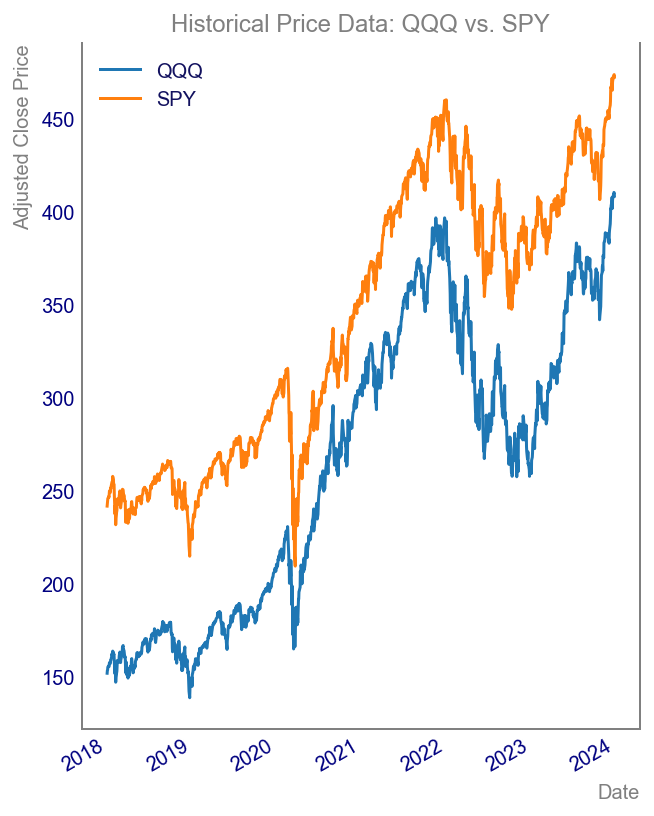

In [2]:

plt.style.use('ddm-chart.mplstyle')
data.plot()
plt.title('Historical Price Data: QQQ vs. SPY')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.show()


### Annualized Returns of QQQ and SPY

Now, let's compare the annualized returns of QQQ and SPY over the same time period. This helps to evaluate the consistency and average performance of each fund on an annual basis.


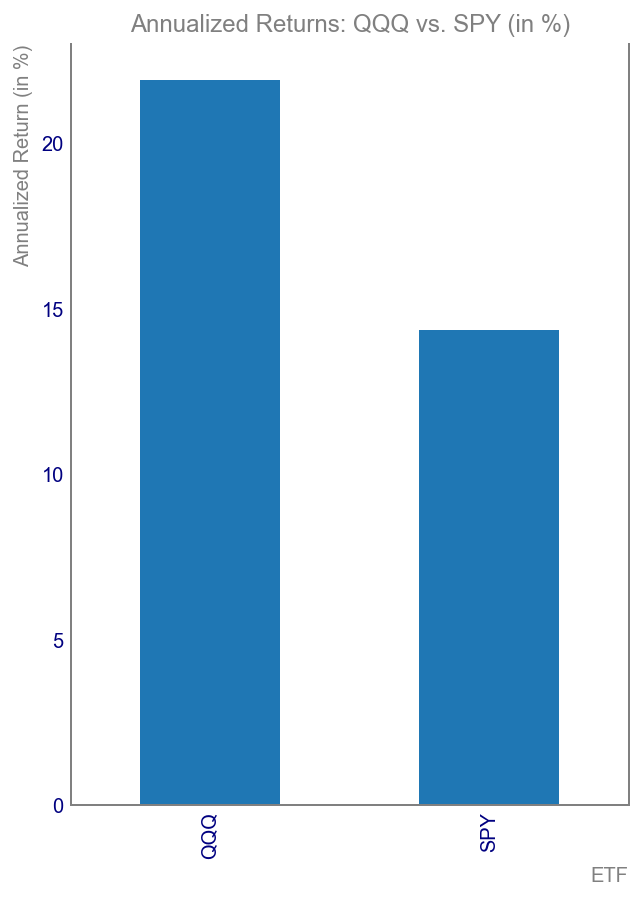

In [3]:
# Calculate annualized returns
annualized_returns = (((data.iloc[-1] / data.iloc[0]) ** (1 / 5)) - 1) * 100

# Plot the annualized returns
plt.style.use('ddm-chart.mplstyle')
annualized_returns.plot(kind='bar')
plt.title('Annualized Returns: QQQ vs. SPY (in %)')
plt.xlabel('ETF')
plt.ylabel('Annualized Return (in %)')
plt.show()


### Historical Volatility of QQQ and SPY

To understand the risk associated with each ETF, we will plot their historical volatility. This is computed as the standard deviation of returns over the last five years, highlighting periods of higher volatility.


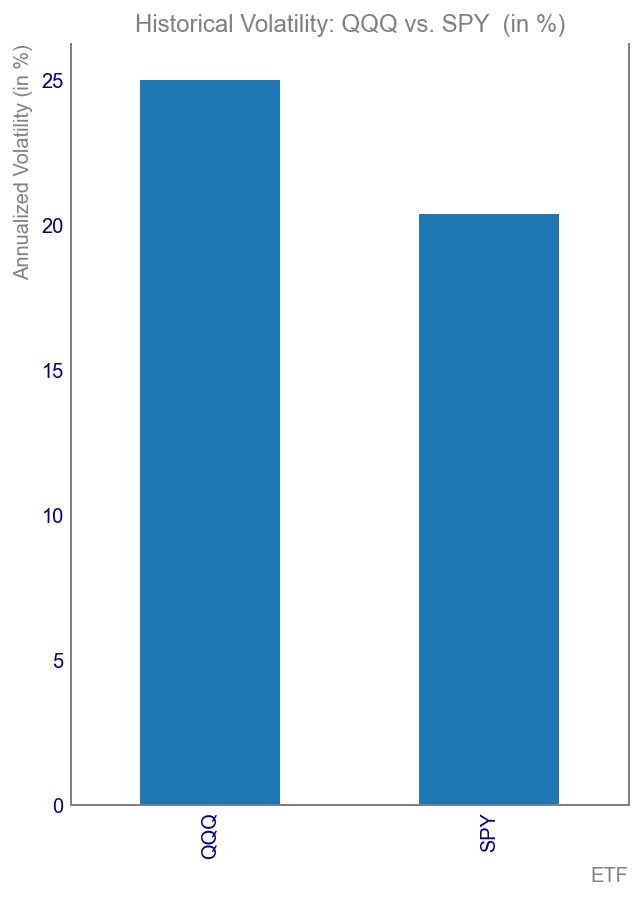

In [4]:
# Calculate historical volatility
volatility = data.pct_change().std() * (252 ** 0.5) * 100 # Annualized standard deviation

# Plot historical volatility
plt.style.use('ddm-chart.mplstyle')
volatility.plot(kind='bar')
plt.title('Historical Volatility: QQQ vs. SPY  (in %)')
plt.xlabel('ETF')
plt.ylabel('Annualized Volatility (in %)')
plt.show()


### Calculating Excess Returns of QQQ and SPY

To move towards the Sharpe Ratio, let's calculate the excess returns of QQQ and SPY by subtracting the risk-free rate (say, 4% per annum for example) from their respective returns. This sets the stage for understanding how much return is gained relative to a risk-free investment.


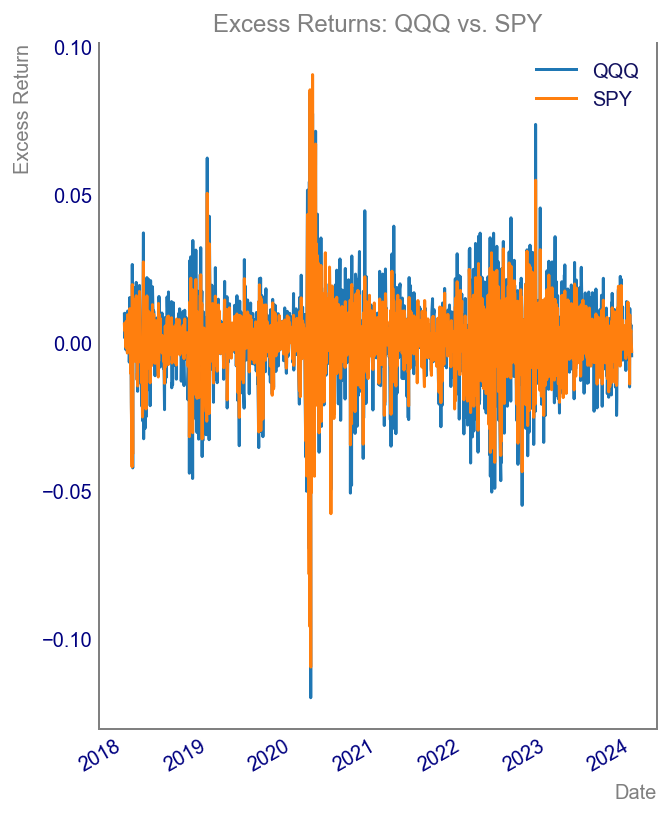

In [5]:
risk_free_rate = 0.04

# Calculate excess returns
excess_returns = data.pct_change() - risk_free_rate / 252

# Plot the excess returns
plt.style.use('ddm-chart.mplstyle')
excess_returns.plot()
plt.title('Excess Returns: QQQ vs. SPY')
plt.xlabel('Date')
plt.ylabel('Excess Return')
plt.show()


### Sharpe Ratios for QQQ and SPY

Now, let's calculate and display the Sharpe Ratios for QQQ and SPY. This provides a visual representation of their risk-adjusted performance, giving immediate insight into which asset class, fund or ETF has delivered better returns relative to the risks taken.


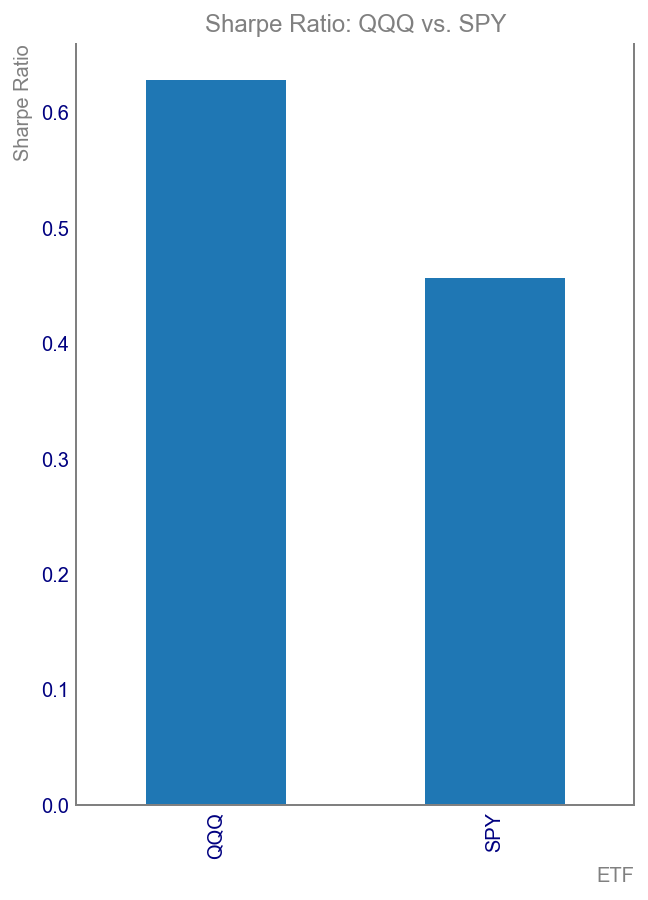

In [6]:
# Calculate Sharpe Ratios
sharpe_ratio = excess_returns.mean() / excess_returns.std() * (252 ** 0.5)

# Plot the Sharpe Ratios
plt.style.use('ddm-chart.mplstyle')
sharpe_ratio.plot(kind='bar')
plt.title('Sharpe Ratio: QQQ vs. SPY')
plt.xlabel('ETF')
plt.ylabel('Sharpe Ratio')
plt.show()


### Rolling Sharpe Ratios for QQQ and SPY

Observing the rolling Sharpe Ratios over a 12-month window provides enhanced insight into how risk-adjusted performance has changed over time under different market conditions.


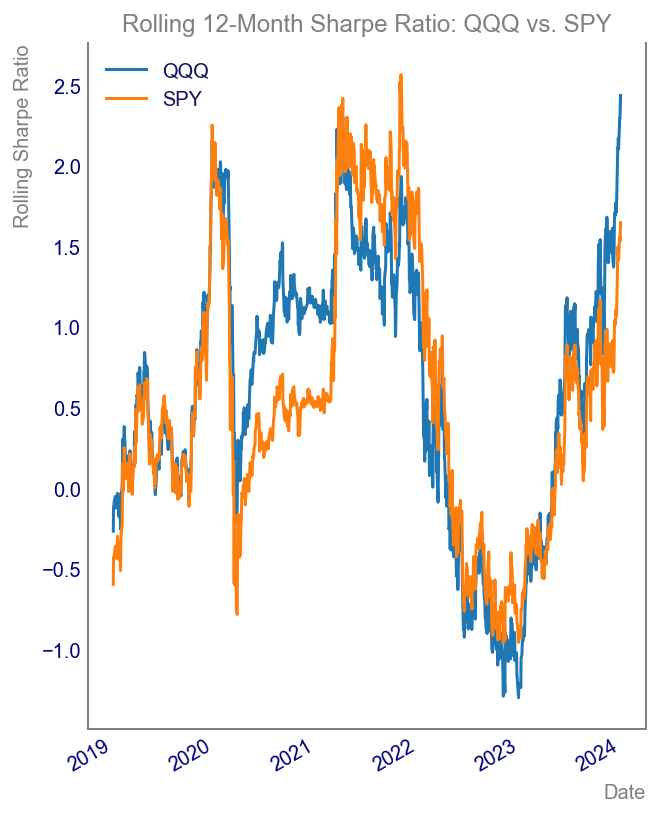

In [7]:
# Calculate rolling Sharpe Ratios
rolling_sharpe = (excess_returns.rolling(window=252).mean() / excess_returns.rolling(window=252).std()) * (252 ** 0.5)

# Plot rolling Sharpe Ratios
plt.style.use('ddm-chart.mplstyle')
rolling_sharpe.plot()
plt.title('Rolling 12-Month Sharpe Ratio: QQQ vs. SPY')
plt.xlabel('Date')
plt.ylabel('Rolling Sharpe Ratio')
plt.show()


### Comparing Cumulative Sharpe Ratios of QQQ and SPY

Lastly, let's compare the cumulative Sharpe Ratios of QQQ and SPY against a designated benchmark (e.g., a broader market index). This helps to gauge how well each ETF has outperformed relative to overall market trends.


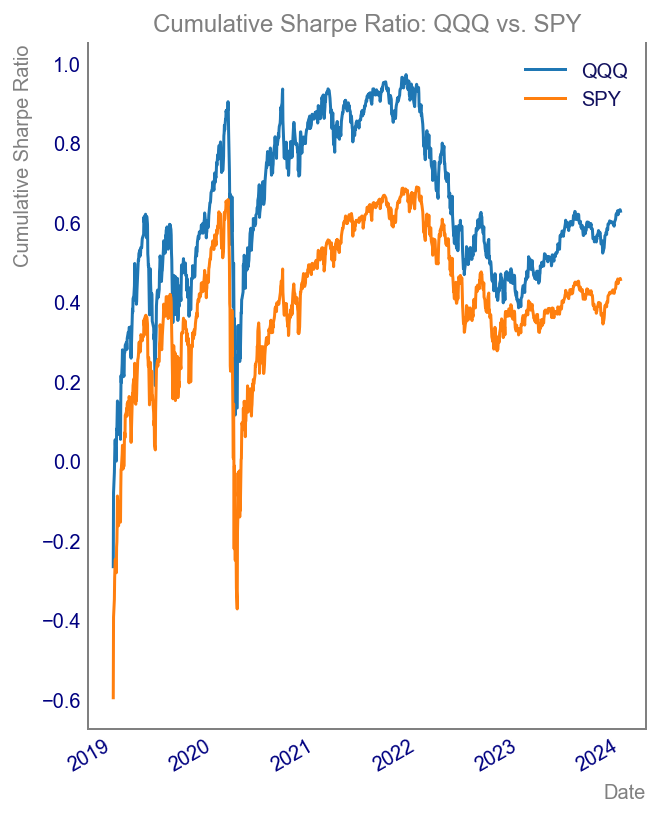

In [8]:
# Calculate cumulative Sharpe Ratios
cumulative_sharpe = ((excess_returns.expanding(min_periods=252).mean()) / excess_returns.expanding().std()) * (252 ** 0.5)

# Plot cumulative Sharpe Ratios
plt.style.use('ddm-chart.mplstyle')
cumulative_sharpe.plot()
plt.title('Cumulative Sharpe Ratio: QQQ vs. SPY')
plt.xlabel('Date')
plt.ylabel('Cumulative Sharpe Ratio')
plt.show()


### Scatter Plot of Risk vs. Return

Finally, we will create a scatter plot of risk versus return, plotting the expected returns of QQQ and SPY against their respective standard deviations. This visual representation underscores the efficient frontier concept, providing a comprehensive view of optimal risk-return trade-offs.


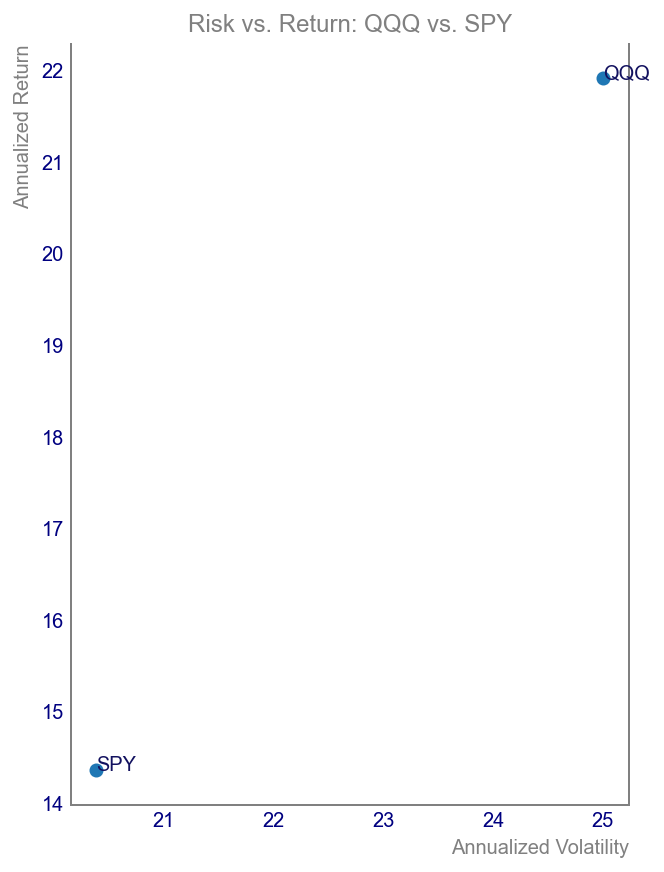

In [9]:
# Calculate expected returns and standard deviations
expected_returns = annualized_returns
risk = volatility

# Scatter plot of risk vs. return
plt.style.use('ddm-chart.mplstyle')
plt.scatter(risk, expected_returns, label=['QQQ', 'SPY'])
for i, txt in enumerate(risk.index):
    plt.annotate(txt, (risk[i], expected_returns[i]))
plt.title('Risk vs. Return: QQQ vs. SPY')
plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Return')
plt.show()


## Conclusion

We have delved into the Sharpe Ratio, examined its merits and limitations, and visualized its application using real-world datasets of QQQ and SPY. This exploration highlights how investors can leverage this crucial metric for better risk-adjusted decision-making. While the Sharpe Ratio is invaluable, it’s essential to be aware of its limitations, such as the assumption of normally distributed returns and its sensitivity to the chosen risk-free rate.

For further reading, check out these insightful resources:

- [Investopedia on Sharpe Ratio](https://www.investopedia.com/terms/s/sharperatio.asp)
- [Khan Academy on CAPM and Sharpe Ratio](https://www.khanacademy.org/economics-finance-domain/core-finance/investment-vehicles-tutorial/capital-asset-pricing-model/v/sharpe-ratio)

Make sure to visit the Data Driven Minutes Youtube channel for a corresponding video on this topic. Happy investing!


[About us and Disclaimers](/about.qmd)